In [ ]:
!pip install tqdm

In [7]:
import numpy as np
import cv2
import s3fs
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image, ImageFilter
%matplotlib inline

# Extract Annotations Function

In [28]:
def extract_raw_annotations(s3_file, save_path, volume_name, volume_shape, start_inline, start_xline, z_step):
    fs = s3fs.S3FileSystem()
    
    # reading and decoding raw annotations file from s3
    horizons_dat = [i.strip().split() for i in (l.decode('utf-8') for l in fs.open(s3_file).readlines())]
    
    print('Complete reading annotations file')
    
    # cleaning up and normalazing the values
    horizons_dat = [[int(i[1]) - start_inline, int(i[2])-start_xline, round(float(i[3])/z_step)] for i in horizons_dat if not (i[1]=='"Inline"' or i[1]=='-')]
    
    # creating an empty volume
    masks = np.zeros(volume_shape, dtype=int)
    
    # populating the volume with annotations
    for h in horizons_dat:
        try:
            masks[h[0]][h[2]][h[1]] = 255
        except Exception as e:
            print(e)
    
    # saving annotated inlines as PNG images
    idx = start_inline
    for mask in tqdm(masks):
        plt.imsave(f'{save_path}/{volume_name}_{idx}.png', mask.astype(int) , cmap='gray')
        idx += 1

In [ ]:
!mkdir masks

## Poseidon

In [12]:
extract_raw_annotations(f's3://ml-for-seismic-data-interpretation/Annotations/Poseidon_h_ix_bulk.dat',
                       'masks',
                       'poseidon',
                       (2601, 1326, 2301),
                       1000,
                       900,
                       4)

Complete reading annotations file


100%|██████████| 2601/2601 [09:36<00:00,  4.51it/s]


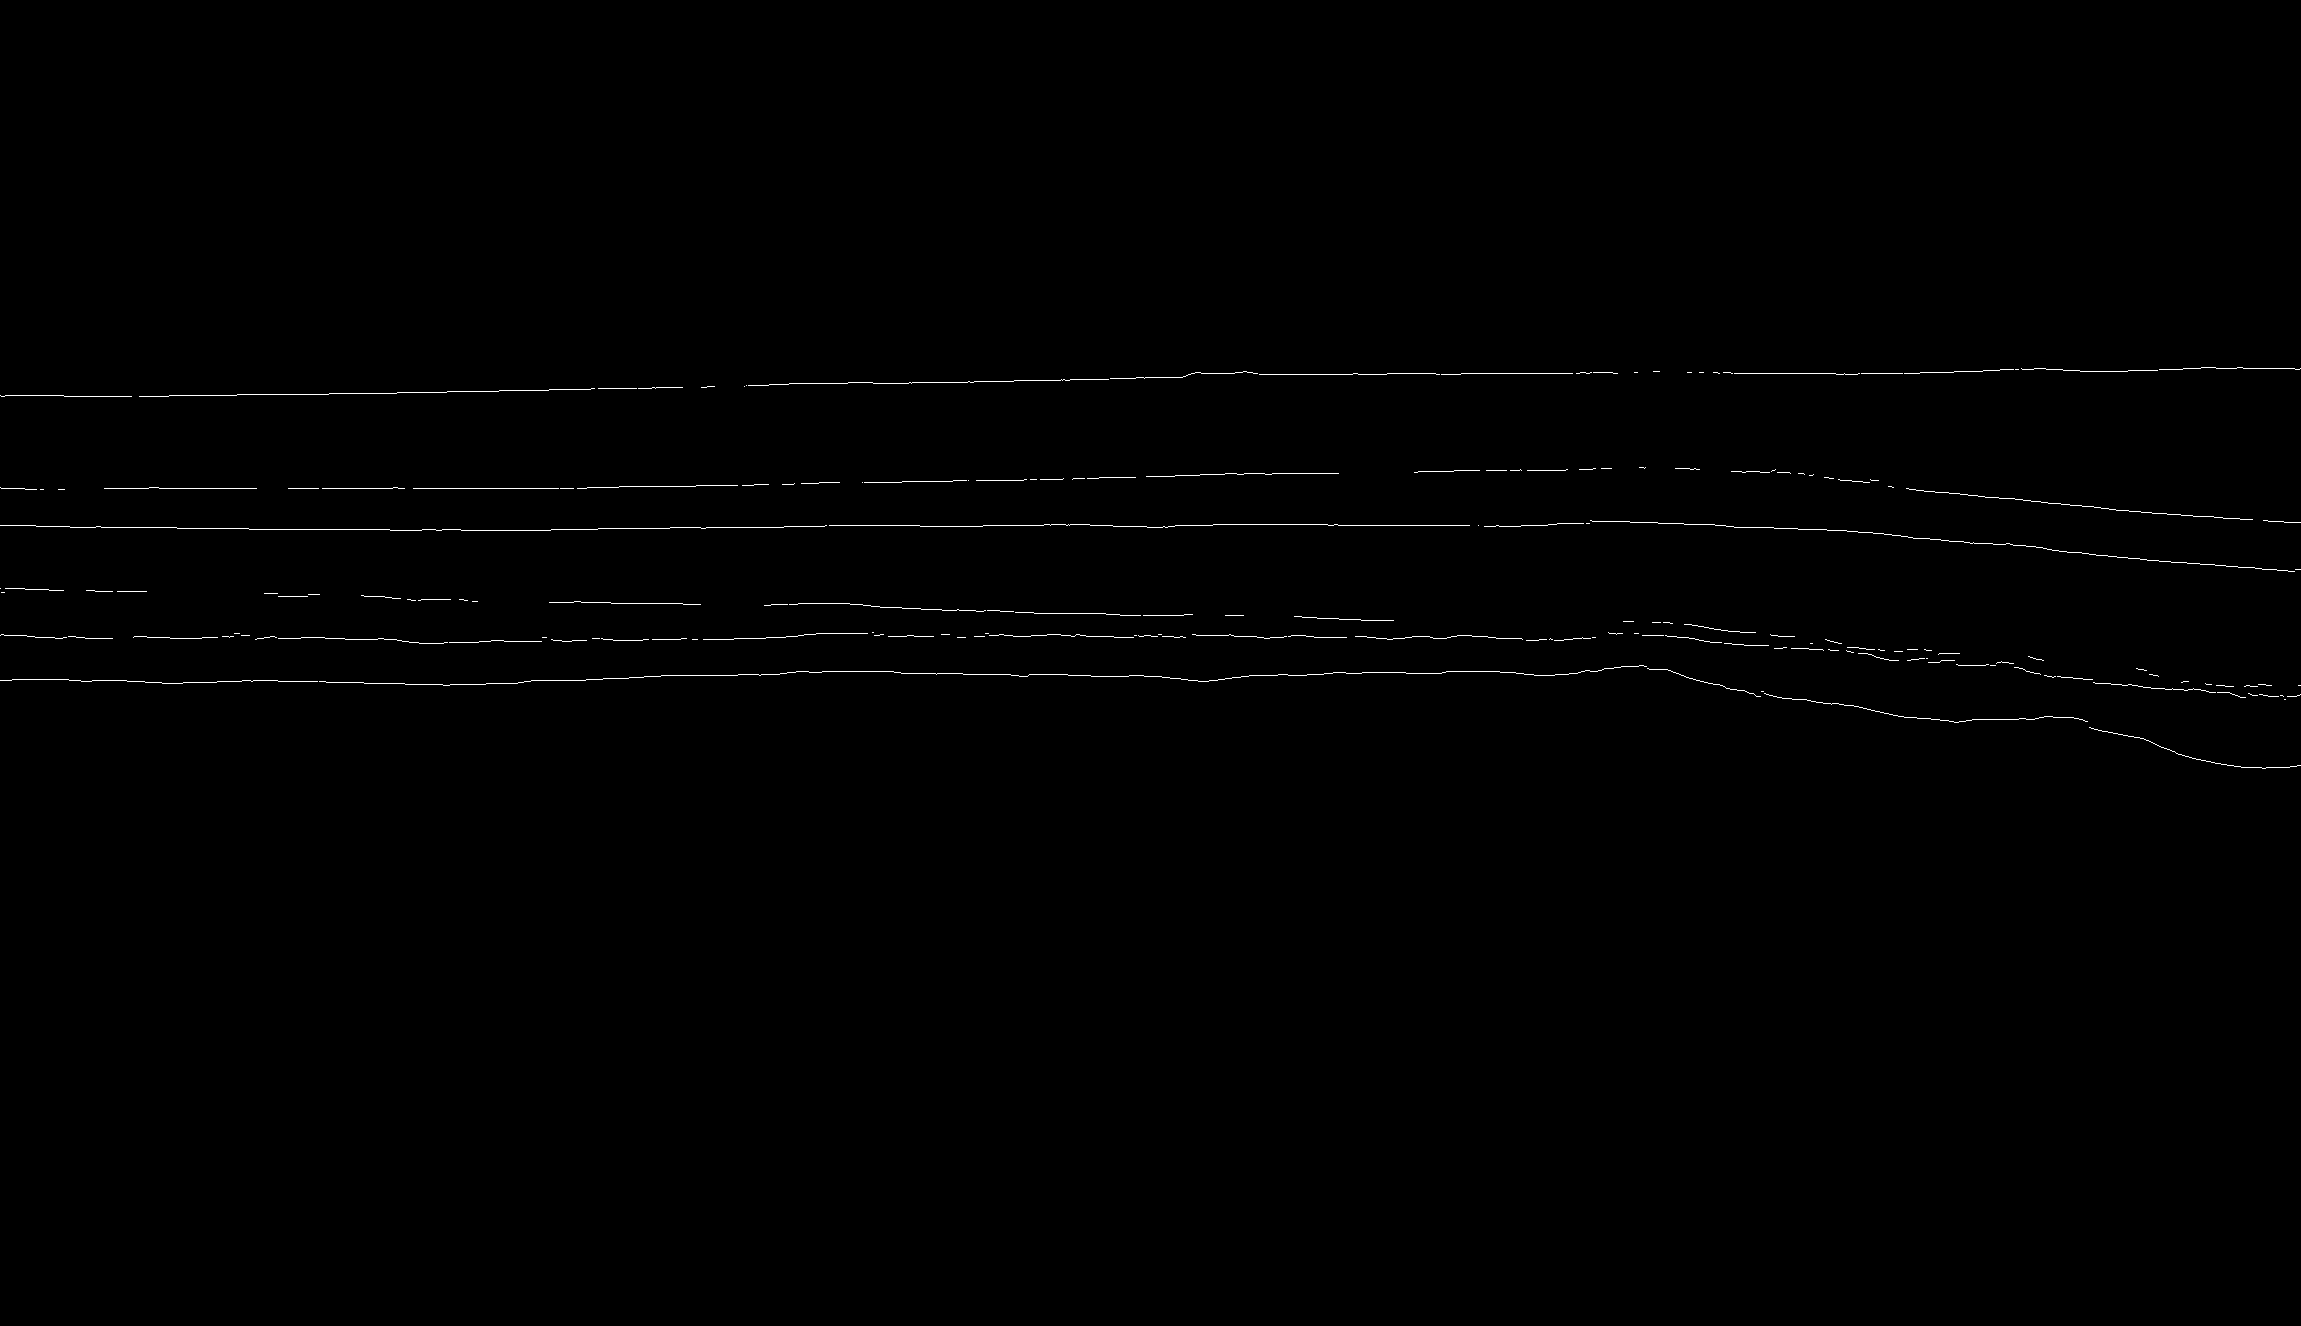

In [14]:
Image.open('masks/poseidon_1001.png')

## Kerry

In [9]:
m = extract_raw_annotations(f's3://ml-for-seismic-data-interpretation/Annotations/Kerry_h_ix_bulk.dat',
                       'masks',
                       'kerry',
                       (286, 1252, 730),
                       511,
                       58,
                       4)

Complete reading annotations file
index 730 is out of bounds for axis 0 with size 730
index 731 is out of bounds for axis 0 with size 730
index 730 is out of bounds for axis 0 with size 730
index 731 is out of bounds for axis 0 with size 730
index 730 is out of bounds for axis 0 with size 730
index 731 is out of bounds for axis 0 with size 730
index 730 is out of bounds for axis 0 with size 730
index 731 is out of bounds for axis 0 with size 730
index 730 is out of bounds for axis 0 with size 730
index 731 is out of bounds for axis 0 with size 730
index 730 is out of bounds for axis 0 with size 730
index 731 is out of bounds for axis 0 with size 730


100%|██████████| 286/286 [00:18<00:00, 15.32it/s]

index 731 is out of bounds for axis 0 with size 730
index 730 is out of bounds for axis 0 with size 730
index 731 is out of bounds for axis 0 with size 730


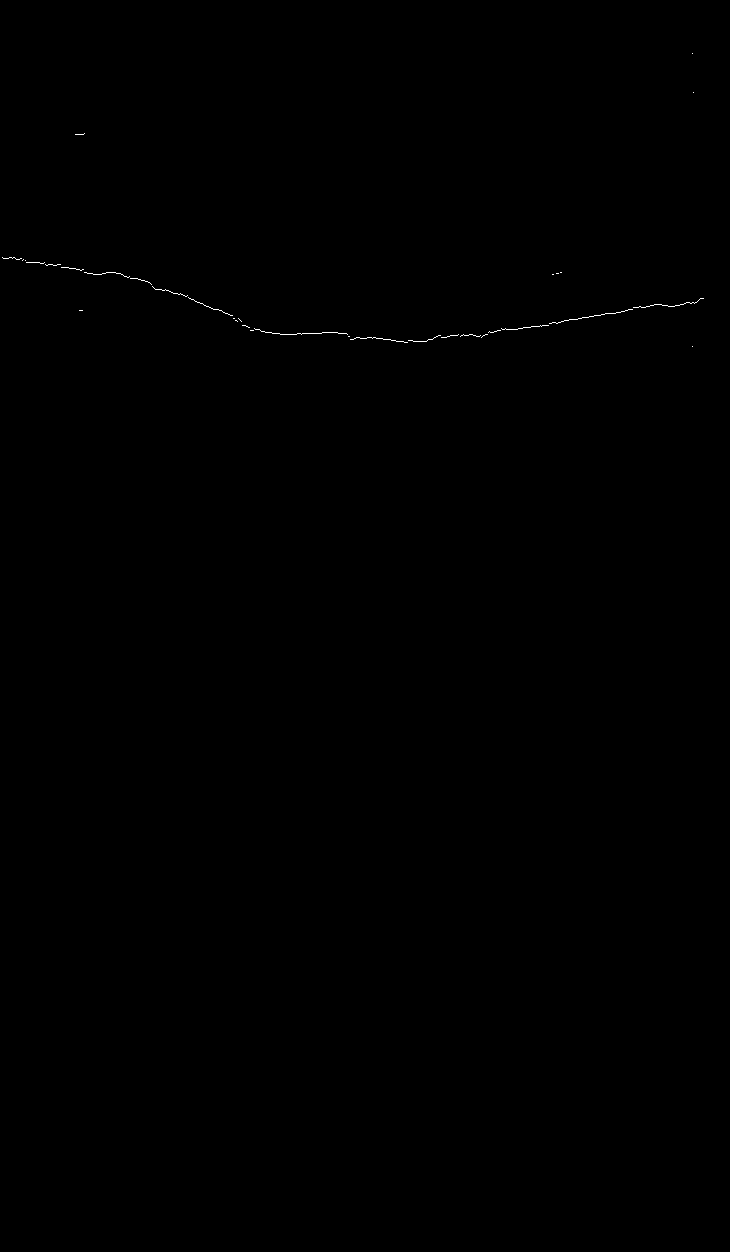

In [16]:
Image.open('masks/kerry_600.png')

## Parihaka
In-line range: 1735 - 2657 - 1
Cross-line range: 4200 - 5325 - 1
Z range(ms): 0 - 3501 - 3
Inl/Crl bin size (m/line): 25.00/12.50
CRS: Unlocated XY
Area: 324.79 (sq km); Survey type: Both 2D and 3D
In-line Orientation: 57.00 Degrees from N

In [10]:
extract_raw_annotations(f's3://ml-for-seismic-data-interpretation/Annotations/Parihaka_h_ix_bulk.dat',
                       'masks',
                       'parihaka',
                       (923, 1168, 1126),
                       1735,
                       4200,
                       3)

Complete reading annotations file


100%|██████████| 923/923 [01:20<00:00, 11.51it/s]


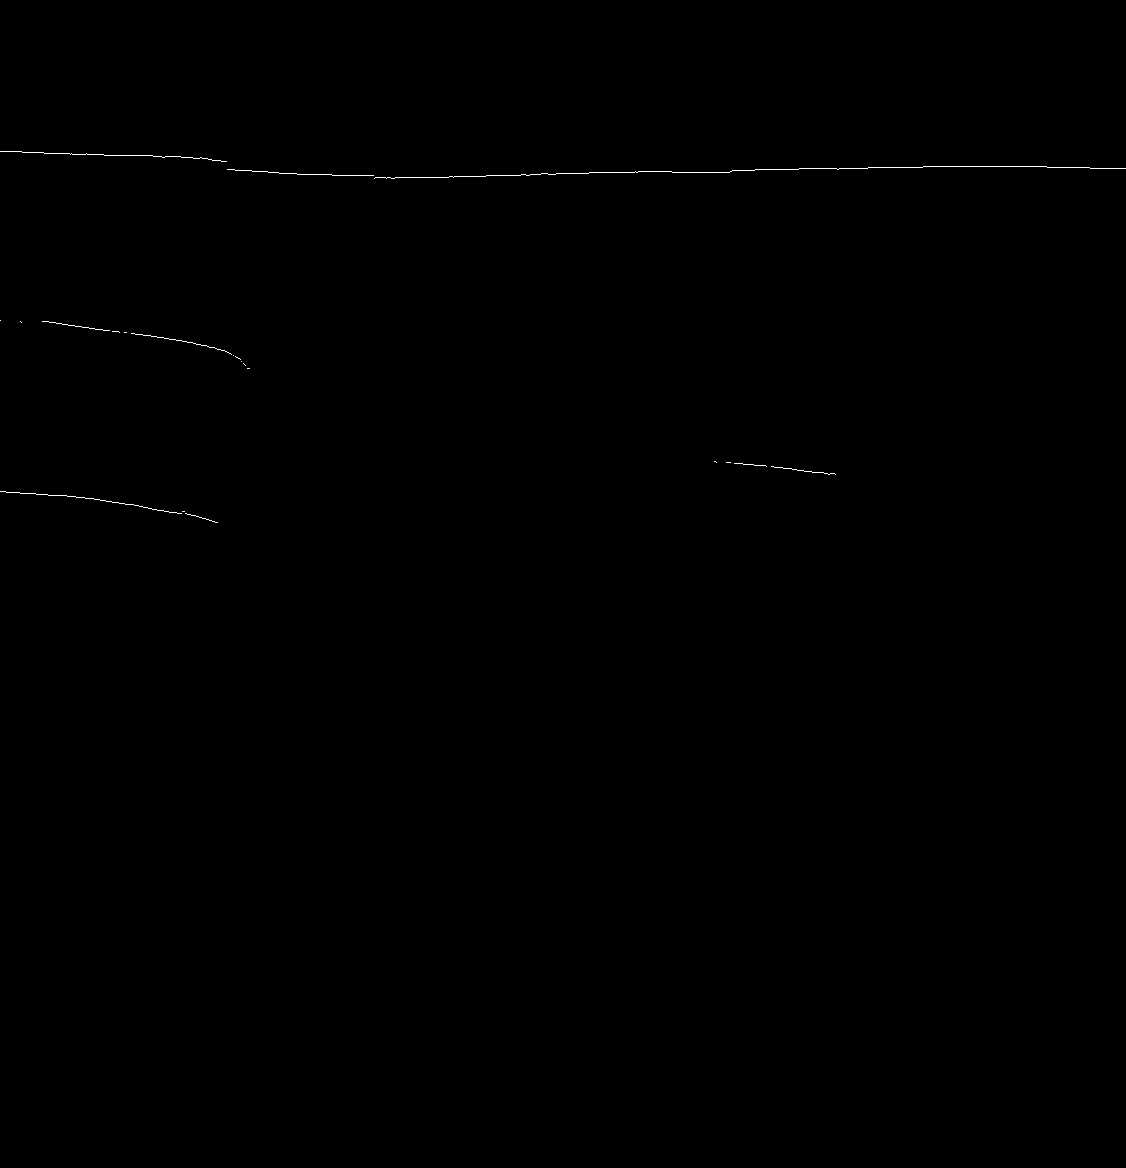

In [26]:
Image.open('masks/parihaka_2200.png')

## Uploading raw annotations to S3

In [ ]:
!aws s3 cp --recursive masks s3://ml-for-seismic-data-interpretation/raw_data/masks/